In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits

In [2]:
# Generate synthetic clustered data
X, _ = make_blobs(n_samples=500, centers=3, random_state=42)

In [3]:
print("Original Data Matrix (X):\n", X)

Original Data Matrix (X):
 [[-5.73035386 -7.58328602]
 [ 1.94299219  1.91887482]
 [ 6.82968177  1.1648714 ]
 [-2.90130578  7.55077118]
 [ 5.84109276  1.56509431]
 [ 5.47021465  1.11708586]
 [-4.31954265 -6.97616949]
 [ 4.91033566  1.92293157]
 [ 3.57225841  1.8307902 ]
 [-7.50444577 -6.85401854]
 [ 3.99330595  0.89162168]
 [-1.35060204  8.19360381]
 [-0.37616425  7.06219833]
 [-1.93830711 10.14985177]
 [ 4.92965369  4.04857048]
 [ 5.69830332  0.2144302 ]
 [-2.58120774 10.01781903]
 [-8.00234921 -6.49769985]
 [-6.7973432  -5.81462922]
 [-3.6155326   7.8180795 ]
 [ 3.24131126  2.53613892]
 [-2.30033403  7.054616  ]
 [ 5.2164358   2.28441984]
 [-5.31410316 -6.94585985]
 [-7.32606081 -6.6860196 ]
 [ 5.03433098  1.5521852 ]
 [ 4.38490162  3.47716267]
 [-6.09382703 -6.45465203]
 [-6.61257693 -5.9904788 ]
 [-1.55519586  9.66567738]
 [ 4.60712557  1.42974491]
 [-1.6966718  10.37052616]
 [-3.49973395  8.4479884 ]
 [-3.83738367  9.21114736]
 [ 5.01102471  1.3691845 ]
 [ 4.40093079  1.06560602]
 

In [5]:
print("Square Data Matrix (X):\n", D)

Square Data Matrix (X):
 [[ 0.         12.21357033 15.30636316 ... 15.05660937  2.42192616
  15.54198098]
 [12.21357033  0.          4.94451779 ...  2.9231185  12.14073886
   3.58647904]
 [15.30636316  4.94451779  0.         ...  3.53775442 15.85857356
   2.87591374]
 ...
 [15.05660937  2.9231185   3.53775442 ...  0.         15.05935233
   0.86592283]
 [ 2.42192616 12.14073886 15.85857356 ... 15.05935233  0.
  15.65161068]
 [15.54198098  3.58647904  2.87591374 ...  0.86592283 15.65161068
   0.        ]]


In [23]:
def vatManual(X):
    """
    Visual Assessment of Tendency (VAT) implementation:
    
    Parameters:
    X : ndarray
        The input data matrix (objects as rows, features as columns).
        
    Returns:
    R : ndarray
        The reordered dissimilarity matrix.
        
        Displays 4 graphs:
        1. Scatter Plot of Data (Before VAT)
        2. Scatter Plot of Data (After VAT)
        3. Dissimilarity Matrix (Before VAT)
        4. Dissimilarity Matrix (After VAT) 
    """
    
    # Step 1: Compute the pairwise distance matrix
    D = dist.squareform(dist.pdist(X, metric='euclidean'))  # Convert the pairwise distances into a square matrix.
    # 'dist.pdist' computes the pairwise distance between each pair of points in X using the Euclidean metric.
    # 'dist.squareform' converts the condensed distance matrix (1D) into a square matrix (2D).

    print("Square Data Matrix (X):\n", D)

    # Step 2: VAT ordering (Prim's Minimum Spanning Tree-based algorithm)
    n = D.shape[0]  # Get the number of points (objects) in the dataset (size of the square dissimilarity matrix).
    P = np.zeros(n, dtype=int)  # Initialize an array P to store the reordered indices (of size n).
    J = np.arange(n)  # Create an array J of available indices (0, 1, 2, ..., n-1).
    i = np.argmax(D[0])  # Find the index of the point that is most distant from the first point in the dataset.
    P[0] = i  # Set the first index of the reordered list as the most distant point.
    J = np.delete(J, i)  # Remove this point from the list of available indices J.
    
    # Step 3: Iteratively reorder the points using Prim's Minimum Spanning Tree (MST) approach
    for r in range(1, n):
        # For each remaining point, find the one that is most similar (minimizing the maximum dissimilarity) to the reordered points.
        i = J[np.argmin(D[P[:r]][:, J].max(axis=0))]  # Find the next point with the minimum dissimilarity to the existing reordered points.
        P[r] = i  # Assign this point to the r-th position in the reordered list P.
        J = np.delete(J, np.where(J == i))  # Remove the selected point from the list of available points J.

    # Step 4: Reorder the dissimilarity matrix based on the reordered indices
    R = D[np.ix_(P, P)]  # Use advanced indexing to reorder the rows and columns of the original dissimilarity matrix D.
    
    # Create a 2x2 grid for subplots with a specific size (10x8 inches).
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    # Top row:
    # Left plot: Show dissimilarity matrix before VAT
    axes[1, 0].imshow(D, cmap='gray', aspect='equal')  # Display the dissimilarity matrix as an image in grayscale.
    axes[1, 0].set_title("Dissimilarity Matrix (Before VAT)")  # Title for the left subplot.
    axes[1, 0].set_xlabel("Objects")  # Label for the x-axis.
    axes[1, 0].set_ylabel("Objects")  # Label for the y-axis.
    fig.colorbar(axes[1, 0].imshow(D, cmap='gray'), ax=axes[1, 0], label="Dissimilarity")  # Add a color bar to indicate the scale of dissimilarity.
    
    # Right plot: Scatter plot of the data
    axes[0, 0].scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)  # Create a scatter plot of the first two features (columns) of the data X.
    axes[0, 0].set_title("Scatter Plot of Data (Before VAT)")  # Title for the right subplot.
    axes[0, 0].set_xlabel("Feature 1")  # Label for the x-axis.
    axes[0, 0].set_ylabel("Feature 2")  # Label for the y-axis.
    
    # Bottom row:
    # Left plot: VAT-reordered dissimilarity matrix
    im = axes[1, 1].imshow(R, cmap='gray', aspect='equal')  # Display the VAT-reordered dissimilarity matrix as an image.
    axes[1, 1].set_title("Dissimilarity Matrix (After VAT)")  # Title for the left subplot.
    axes[1, 1].set_xlabel("Objects")  # Label for the x-axis.
    axes[1, 1].set_ylabel("Objects")  # Label for the y-axis.
    fig.colorbar(axes[1, 1].imshow(R, cmap='gray'), ax=axes[1, 1], label="Dissimilarity")  # Add a color bar to indicate the scale of dissimilarity.
    
    # Right plot: Scatter plot of the reordered data
    axes[0, 1].scatter(R[:, 0], R[:, 1], s=10, alpha=0.7)  # Create a scatter plot of the first two features of the reordered dissimilarity matrix.
    axes[0, 1].set_title("Scatter Plot of Data (After VAT)")  # Title for the right subplot.
    axes[0, 1].set_xlabel("Feature 1")  # Label for the x-axis.
    axes[0, 1].set_ylabel("Feature 2")  # Label for the y-axis.
    
    plt.tight_layout()  # Automatically adjust the spacing between subplots for better layout.
    plt.show()

    return R  # Return the reordered dissimilarity matrix.


Square Data Matrix (X):
 [[ 0.         12.21357033 15.30636316 ... 15.05660937  2.42192616
  15.54198098]
 [12.21357033  0.          4.94451779 ...  2.9231185  12.14073886
   3.58647904]
 [15.30636316  4.94451779  0.         ...  3.53775442 15.85857356
   2.87591374]
 ...
 [15.05660937  2.9231185   3.53775442 ...  0.         15.05935233
   0.86592283]
 [ 2.42192616 12.14073886 15.85857356 ... 15.05935233  0.
  15.65161068]
 [15.54198098  3.58647904  2.87591374 ...  0.86592283 15.65161068
   0.        ]]


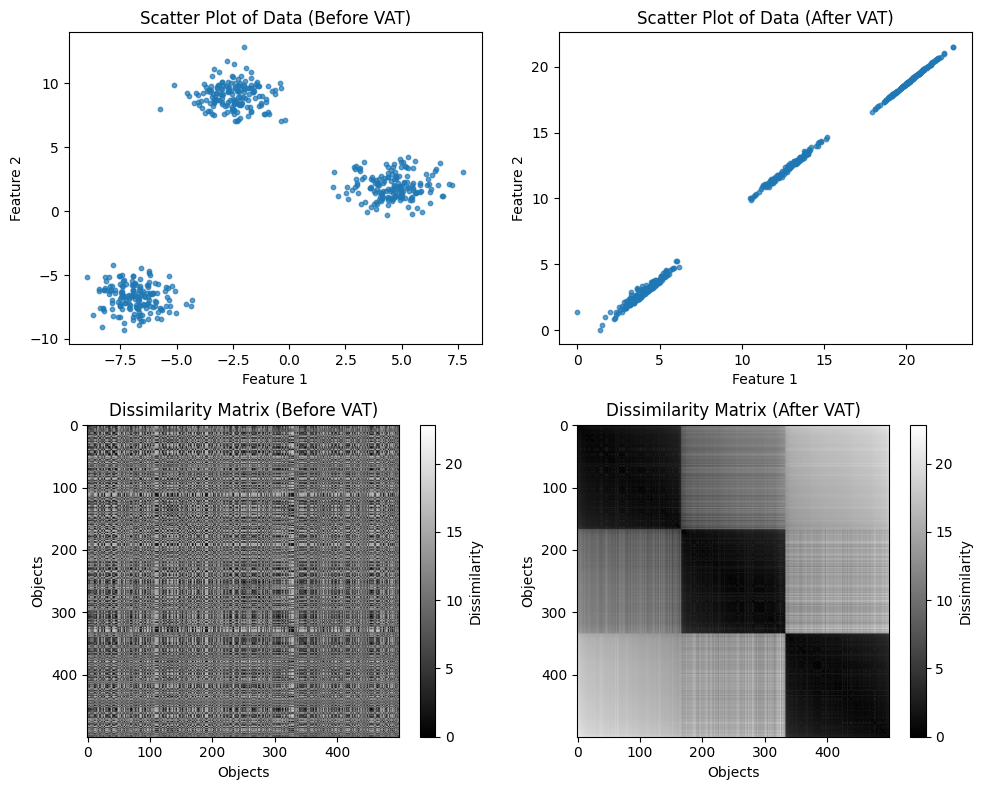

array([[ 0.        ,  1.3750042 ,  1.46203272, ..., 22.28519067,
        22.80450535, 22.84156503],
       [ 1.3750042 ,  0.        ,  0.41420176, ..., 21.0207604 ,
        21.52654686, 21.54160978],
       [ 1.46203272,  0.41420176,  0.        , ..., 20.83175531,
        21.34747792, 21.38050948],
       ...,
       [22.28519067, 21.0207604 , 20.83175531, ...,  0.        ,
         0.76324603,  1.66382733],
       [22.80450535, 21.52654686, 21.34747792, ...,  0.76324603,
         0.        ,  1.02082888],
       [22.84156503, 21.54160978, 21.38050948, ...,  1.66382733,
         1.02082888,  0.        ]])

In [24]:
# Show original dissimilarity matrix and VAT results
vatManual(X)

Iris Dataset:
Square Data Matrix (X):
 [[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 1

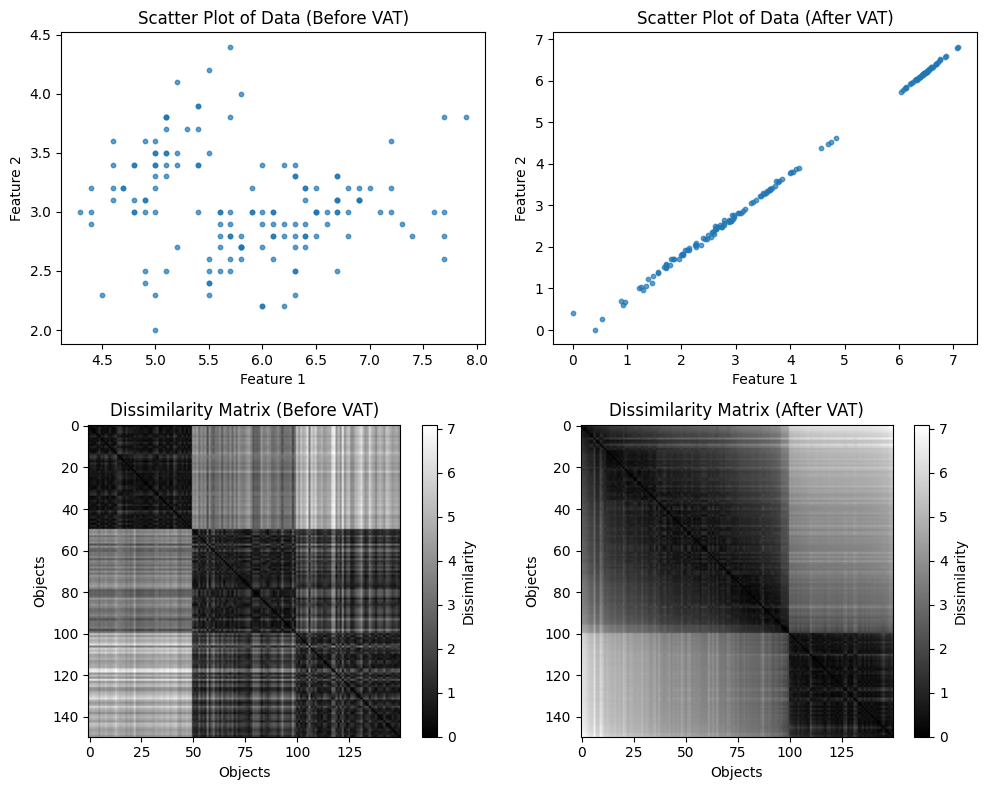

Wine Dataset:
Square Data Matrix (X):
 [[  0.          31.26501239 122.83115403 ... 230.24002302 225.21518399
  506.05936766]
 [ 31.26501239   0.         135.22469301 ... 216.22123207 211.21353863
  490.23526821]
 [122.83115403 135.22469301   0.         ... 350.57118792 345.56265177
  625.07017782]
 ...
 [230.24002302 216.22123207 350.57118792 ...   0.           5.35888981
  276.08601522]
 [225.21518399 211.21353863 345.56265177 ...   5.35888981   0.
  281.06899242]
 [506.05936766 490.23526821 625.07017782 ... 276.08601522 281.06899242
    0.        ]]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 10

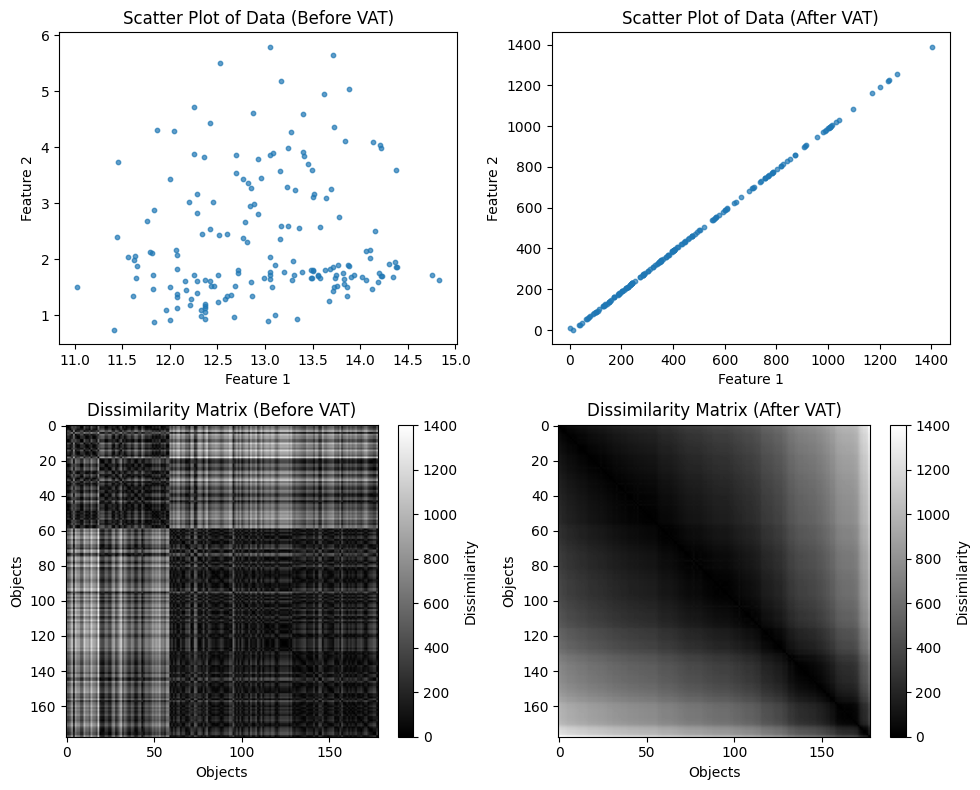

Breast Cancer Dataset:
Square Data Matrix (X):
 [[   0.          341.73026209  376.45576488 ...  914.6951486
   338.48943912 1943.30456536]
 [ 341.73026209    0.          276.77623944 ...  955.8843023
   152.34464456 2044.26314974]
 [ 376.45576488  276.77623944    0.         ...  681.57069699
   133.5953386  1772.19457278]
 ...
 [ 914.6951486   955.8843023   681.57069699 ...    0.
   810.71408767 1095.19034482]
 [ 338.48943912  152.34464456  133.5953386  ...  810.71408767
     0.         1901.1259166 ]
 [1943.30456536 2044.26314974 1772.19457278 ... 1095.19034482
  1901.1259166     0.        ]]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97 

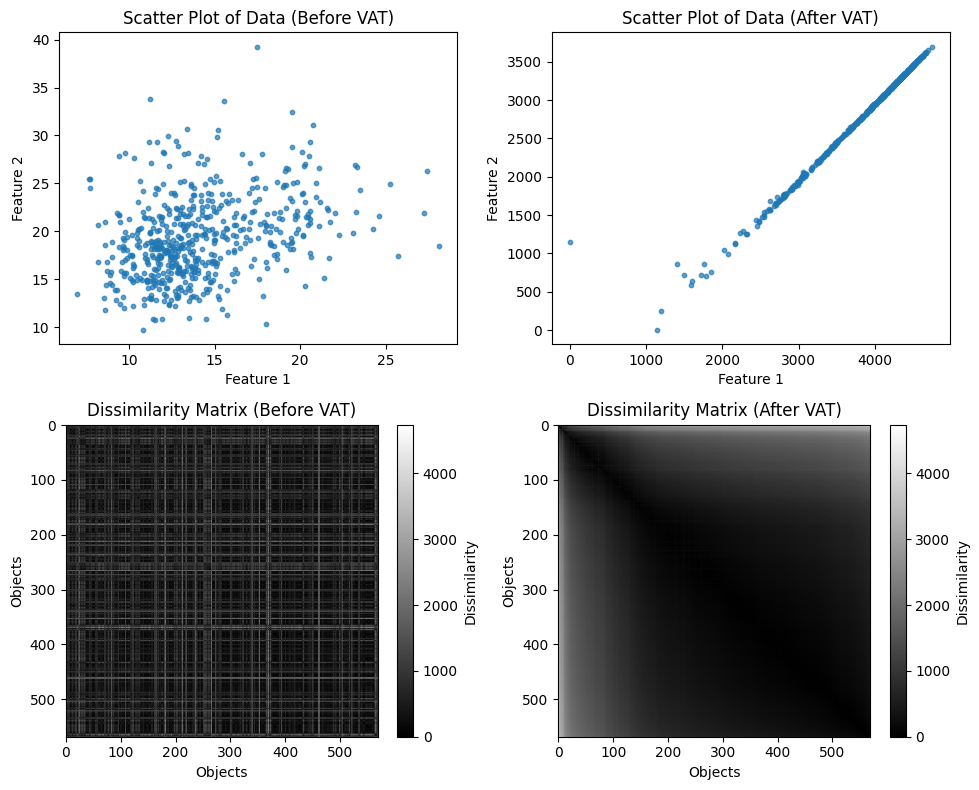

array([[   0.        , 1145.67541972, 1197.41538153, ..., 4666.10857364,
        4692.18001081, 4739.08880575],
       [1145.67541972,    0.        ,  242.4130152 , ..., 3627.20918434,
        3652.31964802, 3699.55326473],
       [1197.41538153,  242.4130152 ,    0.        , ..., 3511.98518797,
        3537.52905692, 3584.63257749],
       ...,
       [4666.10857364, 3627.20918434, 3511.98518797, ...,    0.        ,
          27.02888977,   74.95024494],
       [4692.18001081, 3652.31964802, 3537.52905692, ...,   27.02888977,
           0.        ,   50.36995472],
       [4739.08880575, 3699.55326473, 3584.63257749, ...,   74.95024494,
          50.36995472,    0.        ]])

In [22]:
print("Iris Dataset:")
iris = load_iris()
vatManual(iris.data)

print("Wine Dataset:")
wine = load_wine()
vatManual(wine.data)

print("Breast Cancer Dataset:")
breast_cancer = load_breast_cancer()
vatManual(breast_cancer.data)